<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch08_TP_LotkaVolterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch08 - TP : système de Lotka-Volterra en dynamique des populations**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

# **Modélisation d'un système "prédateurs-proies" :**

<img src="https://drive.google.com/uc?id=1aCE24N6haLgiczWkJEmIenmpaaOnpCvq" width="400" height="280" align = "center"/>


**Certains éléments de ce NoteBook tiennent lieu de cours et sont à connaître, tant dans les connaissances que dans les méthodes !**

---
## **Historique**

(**source :** https://docplayer.fr/113033680-La-dynamique-des-populations-modele-continu-partie-2-modeles-proies-predateurs.html)

L'aventure de ce modèle est assez particulière puisque ce sont deux scientifiques : un américain, Alfred-James LOTKA, et un italien, Vito VOLTERRA qui établissent de manière totalement indépendante, et à quelques mois d'intervalle, en 1925 et 1926, ces équations mathématiques modélisant des équilibres dans des éco-systèmes biologiques.

<img src="https://france3-regions.francetvinfo.fr/image/W5bxBcGA9AhobmPmDDI6au-JGcg/0x0:2303x3484/0x0/regions/2020/06/09/5edf8bf51bdcb_requinmed_posterrequins_60x40cm_03-2017_fr-4304282.jpg" width="340" height="540" align = "left" />

Pour **Volterra**, c'est une histoire de poissons : son gendre, Umberto d'Anconna, biologiste, s'occupait depuis quelques années de statistiques portant sur la pêche dans le nord de la mer Adriatique. 

Ces données concernaient le pourcentage des poissons prédateurs (sélaciens : ordre de poissons marins au squelette cartilagineux comprenant les requins, les raies, les roussettes) pêchés dans trois ports italiens de l'Adriatique pendant la période 1905-1923. 

On avait observé que l'évolution conjointe des deux types de poissons était cyclique : une augmentation des proies, augmentant par la même occasion les ressources pour les espèces prédatrices, entraînait quelques temps après un accroissement de la reproduction de ces dernières, jusqu'à un certain plafond, car plus de prédateurs signifie plus de prédation, et donc une diminution du nombre de proies, et ainsi de suite. Sur le temps long, cela donnait un système extrêmement équilibré.

D'Ancona avait constaté que, pendant la période 1915-1920, où la pêche était moins intense à cause de la guerre (les marins ayant été enrôlés comme soldats), cela avait engendré un déséquilibre, puis un nouvel équilibre.

Mais, il s'avérait que le nombre de sélaciens dans ce nouvel équiibre était en moyenne inférieur à ce qu'il était avant, sur un cycle, ce qui contredisait l'intuition. 

C'est pourquoi il demanda à son beau-père mathématicien, qui avait déjà étudié des sytèmes dynamiques dans le domaine de la physique, de lui fabriquer un modèle capable d'expliquer ce phénomène.


<img src="https://epinal.com/media/posts/y-a-t-il-des-lynx-dans-les-vosges.jpg" width="400" height="340" align = "right" />

Quand à **Lotka**, il publie en 1920 un modèle destiné aux « systèmes organiques », en prenant pour exemple une population d'animaux herbivores qui se nourrissent de plantes : si les herbivores sont trop nombreux, ils usent les ressources végétales, leur population diminue alors, et les végétaux peuvent se reconstituer.

---
Voici une simulation dans un autre langage de programmation : **NetLogo**, spécialisé dans la simulation "multi-agents", il permet de s'affranchir de toute la gestion graphique.

* à télécharger ici : https://ccl.northwestern.edu/netlogo/ 

* programme de simulation à tester (auteur O.Thöni) là : 

    https://github.com/othoni-hub/ECG2/blob/main/Tuto_FileLaLaine.nlogo  


Ce modèle pourtant très simple montre la stabilisation des deux catégories (herbivores/plantes)

* voir aussi, à tester en ligne (sur un écosystème à 3 populations) : https://www.netlogoweb.org/launch#https://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Evolution/Wolf%20Sheep%20Stride%20Inheritance.nlogo 

---



Puis, il s'intéresse au système conjoint des lynx du canada et du lièvre des neiges.

Le lynx du Canada (*Lynx canadensis*) est un félidé commun en Amérique du Nord.
Sa magnifique fourrure est recherchée depuis les débuts de la colonie.
Il est exclusivement carnivore, et dépend étroitement de sa proie principale : le lièvre d'Amérique *(Lepus americanus*). Lorsque le lièvre abonde, il constitue la principale source de nourriture du lynx.

Il travaille à partir des données relatives à la vente des fourrures de la Compagnie de la Baie-d'Hudson (sur le nombre de peaux de lièvres des neiges et de lynx livrées chaque année par les trappeurs) et met en évidence l'existence de 19 cycles complets d'abondance du lynx entre 1852 et 1935, dont la durée moyenne était d'une dizaien d'années entre les pics d'abondance. La fréquence des oscillations notées est assez constante ; toutefois, l'amplitude des pics peut être variable. Ces cycles ont la même fréquence pour le lièvre et le lynx, mais déphasés d'un ou deux ans pour les lynx. (Une femelle ne donne naissance qu'à un petit par an, ce qui crée une certaine inertie...).

Voici récupérées les données produites par la Compagnie de la Baie-d'Hudson, reprises ultérieurement par d'autres chercheurs pour redessiner des modèles un peu moins simplistes, prenant en compte plus de paramètres :

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/othoni-hub/ECG2/main/donnes_li%C3%A8vres_lynx.csv', sep = ';')
df.head()

,Année,Lièvre,Lynx
0,1876,97.12,46.34
1,1877,86.51,45.77
2,1878,72.17,44.15
3,1879,38.32,36.33
4,1880,10.11,12.03


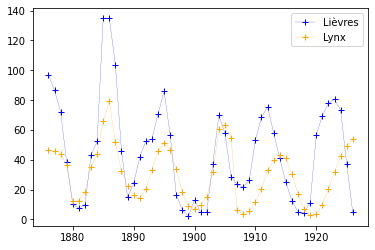

In [15]:
plt.plot(df["Année"], df["Lièvre"], marker ="+", color = 'blue', label = "Lièvres", linewidth = 0.2)
plt.plot(df["Année"], df["Lynx"], marker ="+", color = 'orange', label = "Lynx", linewidth = 0.2)

plt.legend()

plt.show()

In [16]:
#plt.plot(df["Lièvre"], df["Lynx"], marker ="+", color = 'red',  linewidth = 0.2)


---

## **Le principe et le modèle**

(**source :** https://math.unice.fr/~hoering/bio-s2-19/cours-lotka-volterra.pdf)

Considérons l'évolution de deux populations : les proies, des sardines, dont l'évolution des effectifs est régie par une fonction du temps $t$,  $S(t)$, et les prédateurs, des requins, décrits par la fonction $R(t)$.

Dans le modèle de Lotka-Volterra, on fait des hypothèses simplificatrices, par exemple : 
*  Les proies disposent de nourriture en quantité illimitée. Sans interaction avec les prédateurs, elles se développent donc selon un modèle de Malthus (exponentiel : l'accroissement de la population est proportionnel à la population) : $S'(t) = \alpha_1 S(t)$, où $\alpha_1$ est le taux de croissance naturelle, donc on aurait $S(t) = S_0.e^{\alpha_1 . t}$

* De même, les prédateurs-requins se nourrissent uniquement des proies-sardines. Sans interaction avec les proies ils se régresseraient donc selon un modèle de Malthus décroissant : $R′(t) = −\alpha_2 R(t)$
avec $\alpha_2 > 0$, taux de décroissance naturelle (sans proies, leur population connaîtrait une décroissance exponentielle).

* Le nombre des rencontres entre les deux populations est décrit par un terme de la forme $S(t)R(t)$, il est donc proportionnel à ces populations. Afin de décrire l’effet des rencontres, on rajoute des termes aux équations précédentes : 
$\left\{ \begin{matrix}
S'(t) & = &  \alpha_1 S(t)  & - & \beta_1 R(t)S(t) \\
R'(t) & = & -\alpha_2 S(t)  & + & \beta_2 R(t)S(t) \\  
\end{matrix}\right.$

$\beta_1 > 0$ et $\beta_2 > 0$ sont des constantes : puisque $-\beta_1$ est négatif, les rencontres ont, comme on s'en doute, un effet négatif sur les proies, qui vont voir leur croissance ralentir, tandis que  $\beta_2 > 0$ va favoriser la croissance des requins, dont la politique nataliste va être favorisée par cette consommation de ressources...

Il s'agit d'un système de deux équations inconnues, à deux inconnues fonctionnelles, **non linéaire** car les fonctions inconnues sont multipliées entre elles.

Malheureusement, il n'existe pas de procédé de ce système autre que des méthodes approchées (méthode dite de "Runge-Kutta"), mais, comme on va le voir, elles donnent de très bons résultats.

---



## **À titre d'exemple : résolution approchée du système, pas à pas, par la méthode d'Euler**

Donnons à nos paramètres des valeurs particulières (qui sont habituellement déterminées et ajustées en fonction des observations de terrain) :    
$\alpha_1 = 0.8 , \alpha_2 = 0.6 , \beta_1 = 0.4 , \beta_2 = 0.2$ :

$\left\{ \begin{matrix}
S'(t) & = &  0.8 S(t)  & - & 0.4 R(t)S(t) \\
R'(t) & = & -0.6 S(t)  & + & 0.2 R(t)S(t) \\  
\end{matrix}\right.$

Supposons aussi qu’on connaisse le nombre de requins et de sardines au temps $t = 0$ : $S_0 = 5 ,R_0 = 3$.

Etant donné ces populations initiales, on cherche à décrire les fonctions $S(t)$ et $R(t$. On obtient une première idée de ces fonctions en calculant leur dérivée au temps $t = 0$. Puisque ce sont des solutions du système, on a

$\left\{ \begin{matrix}
S'(0) & = &  0.8 \times 5  & - & 0.4 R(0)S(0) \\
R'(0) & = & -0.6 S(t)  & + & 0.2 R(0)S(0) \\  
\end{matrix}\right.$

D'où : $S′(0) = −2 , R′(0) = 1.2$ (la population de sardines va baisser sur ce pas, et celle des requins augmenter).

Placer manuellement ces informations dans un double-graphique.

Si on fait une approximation au 1<sup>er</sup> ordre, après une unité de temps, en suivant la tangente, on aura $S(1) \approx S(0) + S'(0) \times 1$ et $R(1) \approx R(0) + R'(0) \times 1$

* **Réitérer manuellement ces calculs sur deux ou trois étapes supplémentaires.**

* **Éxécuter ces calculs approchés dans un tableur, puis les programmer en Python, sur un intervalle de temps plus long, et avec un pas de temps plus fin, et représenter les deux *plots* obtenus dans une même fenêtre graphique.**

---

## **Trajectoires et champ de directions**

Une autre représentation possible est celle des **trajectoires** : fonction   $X : t \mapsto X(t) = \begin{pmatrix}
 S(t)\\R(t)
\end{pmatrix}$ : on place dans le plan les points obtenus, et les vecteurs-direction $\left ( S'(t),R'(t) \right )$.

Le plan dans lequel on dessine s'appelle le **plan de phase**.

Par exemple, pour $t = 0$, on place le point $\begin{pmatrix}
 5\\3
\end{pmatrix}$, et son vecteur-direction $\left ( -2,1.2 \right )$, comme calculés ci-dessus.

On pourrait faire ainsi pour chaque point du plan : par exemple, le point $\begin{pmatrix}
 2\\1
\end{pmatrix}$ donnera pour vecteur-direction $(0.8 · 2 − 0.4 · 2 · 1,−0.6 · 1 + 0.2 · 2 · 1) = (0.8,−0.2)$.

<img src="https://drive.google.com/uc?id=1915ysmbDoA1ACEYSpRhDKbwh9Whqhm4p" width="400" height="280" align = "center"/>


On obtiendrait finalement le diagramme nommé **"champ de vecteurs"** ou **"champ de directions"** (**"*quiver*"** en anglais, ce qui signifie "carquois")

<img src="https://drive.google.com/uc?id=1cTnPYRZ9Q2_wD_-UXUzQL536QRFO4A5X" width="400" height="280" align = "center"/>

Finalement, pour dessiner une trajectoire passant par un point donné, c'est facile... il suffit de suivre les flèches...

<img src="https://drive.google.com/uc?id=1Iw2jRj2MoRukvocsnKFq6FNYvYQaiJMn" width="400" height="280" align = "center"/>

--> Repérer la trajectoire correspondant aux conditions initiales $\begin{pmatrix}
 5\\3
\end{pmatrix}$.

--> Que se passerait-il si une trajectoire venait à frôler l'un des axes ? Interpréter.



---
## **Point d'équilibre**

--> Dans l'exemple précédent, que pensez-vous qu'il se passe si l'on prend pour conditions initiales le point $\begin{pmatrix}
 3\\2
\end{pmatrix}$ ?

* si les populations démarrent ici, elles restent constantes au cours du temps. On appelle un point avec cette propriété un **point d'équilibre**.

*  $\begin{pmatrix}
 0\\0
\end{pmatrix}$ est bien évidemment aussi un point d'équilibre, mais de peu d'intérêt : s'il n'y a ni sardines, ni requins, c'est qu'on s'est trompé de lieu pour mener notre étude (on parle de point d'équilibre "trivial")

* En ce type de point, les fonctions sont constantes, donc leur dérivée est nulle.

--> Démontrer que les coordonnées du point d'équilibre d'un système de Lotka-Volterra sont :    $\color {red}{\begin{pmatrix}
 \frac{\alpha_2}{\beta_2}\\\frac{\alpha_1}{\beta_1}
\end{pmatrix}}$ (**Théorème**)

**Théorème équivalent :**

Si $(S,R)$ est un couple solution du système, alors, l'expression $\color {red}{H(t) = \beta_2 . R(t) + \beta_1 . S(t) - \alpha_2 . ln (S(t)) -  \alpha_1 . ln (R(t))}$ est constante.

--> Vérifier sur l'exemple.

<img src="https://drive.google.com/uc?id=1NileM_I81V-5pl3o_9kw24GeDIVzYUml" width="400" height="280" align = "center"/>

---


## **Réponse à la problématique initiale de Umberto d'Anconna**

Lors de la 1<sup>ère</sup> Guerre Mondiale, les jeunes pêcheurs de l'Adriatique partis à la guerre, cela a modifié l'équilibre.

On s'attendait à ce que, moins pêchées, les sardines voient leur population moyenne s'accroître, puisque la pêche s'était arrêtée, et ce ne fut pas le cas, au contraire.

— Le taux de croissance des sardines $\alpha_1$ augmente vers $\tilde{\alpha_1}$, car elles sont moins nombreuses à être pêchées.

— Le taux de décroissance des requins $\alpha_2$ diminue vers $\tilde{\alpha_2}$ puisqu’on ne pêchait plus non plus les requins.

— Les coefficients d'interactions $\beta_1$ et $\beta_2$ n’ont pas été modifiés par l'arrêt de la pêche.

--> **Et alors ?**

---

## **Stabilité d'un point d'équilibre**

Un point d'équilibre est dit **stable** si, lors d'une petite perturbation des conditions, le système retournera vers cet équilibre au fil du temps, 

ce sera un point d'équilibre **instable** si au contraire, une petite perturbation aura tendance  à écarter le système de ce point d'équilibre.

---

## **Périodicité**

On a remarqué que le phénomène est **cyclique** ou **périodique**, c'est-à-dire qu'il existe une période T au bout de laquelle, quel que soit le temps écoulé t on se retrouve dans la même situation que T unités de temps auparavant.

Ceci s'écrit : $\exists T / \forall t, X(t+T) = X(t)$

Nous admettrons ce résultat.

---

## **Moyenne sur une période**

* **Définition :** Rappelons que si f est une fonction de classe C<sup>1</sup> sur un intervalle $[a,b]$, alors, la **moyenne** de f sur cet intervalle est : $\color {red}{<f>_{[a,b]} = \frac{1}{b-a}\int_{a}^{b} f(t)dt}$

* **Propriété :** Si f est périodique de période T, sa valeur moyenne est la même sur tous les intervalles d'amplitude T.

--> preuve ?

* **Théorème :** $\color {red}{<S>_{[0,T]} = \frac{\alpha_2}{\beta_2}}$ et $\color {red}{<R>_{[0,T]} = \frac{\alpha_1}{\beta_1}}$

--> preuve : (via la "dérivée logarithmique", méthode à retenir, souvent utile en Économie !)

La 1<sup>ère</sup> équation , puisque S ne s'annule pas (sinon, on l'a vu, elle serait perpétuellement nulle) donne : $\frac{S't)}{S(t)} = \alpha_1 - \beta_1 . R(t)$.

On vérifie facilement que $<R> = \frac{\alpha_1}{\beta_1} - \frac{1}{\beta_1} \int_0^T \left ( \alpha_1 - \beta_1 . R(t) \right ) dt$

D'où : $<R> = \frac{\alpha_1}{\beta_1} - \frac{1}{\beta_1} \int_0^T \frac{S't)}{S(t)} dt =  \frac{\alpha_1}{\beta_1} - \frac{1}{\beta_1} \left [ ln(S(t)) \right ]_0^T = \frac{\alpha_1}{\beta_1} - \frac{1}{\beta_1} \left [ ln(S(T) - ln(S(0))  \right] = \frac{\alpha_1}{\beta_1} - \frac{1}{\beta_1} . 0$ car S est périodique de période T, et donc :  $<R> = \frac{\alpha_1}{\beta_1}$

On procède de même pour l'autre moyenne.

--> Quel est alors le point moyen d'une trajectoire ?


---


## **Retour sur les données de la Compagnie des Fourrures de la Baie-d'Hudson**


<img src="https://www.lesaffaires.com/uploads/images/normal/47c62a7f1bba5687e2ad63c5d19e83bc.jpg" width="320" height="200" align = "center" />

Les paramètres du modèle *lièvres vs lynx*, dont nous avons représenté les données réelles au début de ce NoteBook, ont été ainsi estimés par les chercheurs :          
- Proies : $\alpha_1 = 0.03$ et $\beta_1 = 0.001$
- Prédateurs : $\alpha_2 = 0.05$ et $\beta_2 = 0.0000002$
- Sur leur terrain d'étude les chercheurs ont dénombré à l'instant $t=0$, 50 lynx pour 200 lièvres.

--> En posant $X(t) = \begin{pmatrix}
 S(t)\\R(t)
\end{pmatrix}$, transformer le système différentiel en une équation différentielle de la forme : $X'(t) = F(X(t))$, où $F$ est une fonction de $\mathbb{R}^2$ vers $\mathbb{R}^2$ que l’on explicitera.
Définir en Python cette fonction $F$.

--> Résoudre avec le module *SciPy.integrate* le système différentiel.

--> Représenter les fonctions solutions S et R en fonction de t.

--> Représenter le champ de directions et quelques trajectoires dans le plan de phase (**"portrait de phase**)


--> Recommencer avec des coefficients $\alpha_1$ et $\alpha_2$ un peu diminués. Fait-on les mêmes constats qu'en Méditerranée ?

--> Calculer les points d'équilibre dans ces deux jeux de paramètres.

--- 

## **Discrétisation du modèle de Lotka-Volterra**

Il s'agit là de faire le chemin inverse de celui qui nous a permis de dessiner le début d'une trajectoire en mode "pas à pas". Dans un système différentiel, le temps est une variable continue, si on observe le phénomène à intervalle de temps régulier (on discrétise le temps), on n'a plus affaire à des fonctions, mais à des suites imbriquées. Voici comment.

On écrit le développement limité de S à l'ordre 1 $S(t + h) = S(t) + h.  S'(t) + o(h) = S(t) + h . \left (\alpha_1 . S(t) - \beta_1 . R(t)S(t) \right ) + o(h)$

Le modèle discret s'obtient en prenant h = 1 ( 1 unité de temps) dans la partie principale du développement limité et en négligeant le reste.

$S_{n+1} = S_n +\alpha_1 . S_n - \beta_1 . R_n . S_n  = (1 +\alpha_1 ). S_n - \beta_1 . R_n . S_n  $

et en procédant de même pour R, on arrive au système de deux suites imbriquées :

$\left\{\begin{matrix}
 S_{n+1} = (1 +\alpha_1 ). S_n - \beta_1 . R_n . S_n \\ R_{n+1} = (1 -\alpha_2 ). S_n + \beta_2 . R_n . S_n  \\
\end{matrix}\right. $

--> Programmer le système discret et observer.

## **Transposition à l'Économie**

(**source :** https://perso.univ-rennes1.fr/jean-marie.lion/miashs-2-analyse-appliquee-1.pdf)

Goodwin, économiste influencé par Keynes et Marx, transpose en économie le modèle écologique de Lotka-Volterra. 

Le taux d’emploi remplace les proies et la part du salaire dans la production les prédateurs. Sous des hypothèses similaires sur les relations entre capital, production, investissement, profit, emploi réel, offre de travail, salaire, Goodwin établit que le système

$\left (\begin{matrix}
x \\ y 
\end{matrix}\right ) = 
\left(\begin{matrix}
ax - bxy \\ -cx + dxy 
\end{matrix}\right)$
modélise les évolutions du taux d’emploi x et de la part y du salaire dans la production.

<img src="https://img.over-blog-kiwi.com/2/19/46/11/20161210/ob_0794b5_travailleur-panneau-travaux-drapeau-ro.jpg" width="180" height="160" align = "right" />


--> Expliquer.

---

# **Corrections**

On cherche à résoudre le système suivant, que nous travaillons pour le passer dans la fonction *odeint* de *Numpy.integrate* : $\left\{ \begin{matrix}
y_1'(t) & = &  \alpha_1 y_1(t)  & - & \beta_1 y_1(t)y_2(t) & = &   y_1(t) \left (\alpha_1 - \beta_1 y_2(t) \right )& = & \phi_1 \left( y_1(t),y_2(t),t\right )\\
y_2'(t) & = & -\alpha_2 y_1(t)  & + & \beta_2 y_1(t)y_2(t)  & = &   y_1(t) \left (-\alpha_2 + \beta_2 y_2(t) \right )& = & \phi_2 \left( y_1(t),y_2(t),t\right )\\  
\end{matrix}\right.$

Si on pose $Y(t) = \left ( y_1(t), y_2(t) \right )$ et $\Phi(Y,t) = \left ( \phi_1(Y,t), \phi_2(Y,t) \right )$, le système s'écrit matriciellement : $Y'(t) = \Phi(Y,t)$




In [17]:
%matplotlib inline
from matplotlib.pylab import * # importe aussi numpy sans alias
from scipy.integrate import odeint

In [48]:
# paramètres
a = 0.8
b = 0.4
c = 0.6
d = 0.2

In [49]:
# yy est une liste a deux composantes
pphi_odeint = lambda yy,t : [ yy[0]*(a-b*yy[1]) , -yy[1]*(c-d*yy[0]) ]

On fait varier le temps dans $[0,40]$, et on prend $Y_0 = \begin{pmatrix}
 5\\3
\end{pmatrix}$

In [50]:
t0  = 0
yy0 = [5,3]
tt  = linspace(t0,40,201)

# V1
# odeint revoie une matrice, la colonne j contient l'approximation de la j-ème composante de la fonction inconnue
sol = odeint(pphi_odeint,yy0,tt)
sol_1 = sol[:,0] # [y_1(t) for t in tt]
sol_2 = sol[:,1] # [y_2(t) for t in tt]

# V2
# Pour que odeint renvoit séparément les valeurs de la solution, il faut rajouter .T à la fin pour transposer
sol_1,sol_2 = odeint(pphi_odeint,yy0,tt).T

* **Tracé du couple solution en fonction du temps**

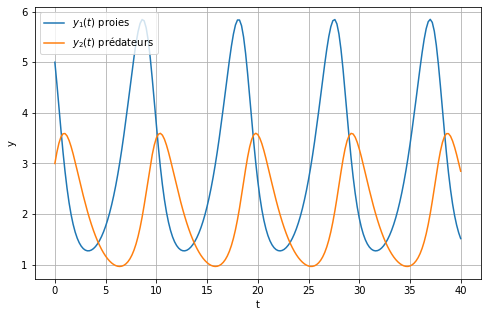

In [51]:
figure(figsize=(8,5))
plot(tt,sol_1,tt,sol_2)
grid()
xlabel('t')
ylabel('y')
legend([r"$y_1(t)$ proies","$y_2(t)$ prédateurs"]);

Rearque : on observe bien la cyclicité sur une préiode d'un peu moins de 10 ans.

* **Tracé du diagramme de phase**

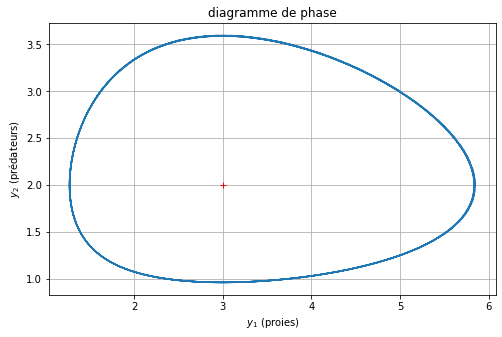

In [52]:
figure(figsize=(8,5))
plot(sol_1,sol_2)
grid()
xlabel(r'$y_1$'+' (proies)')
ylabel(r'$y_2$'+ ' (prédateurs)');
plt.title('diagramme de phase')

plot(c/d,a/b, '+r')
plt.show()

* **Ajout du champ de directions**

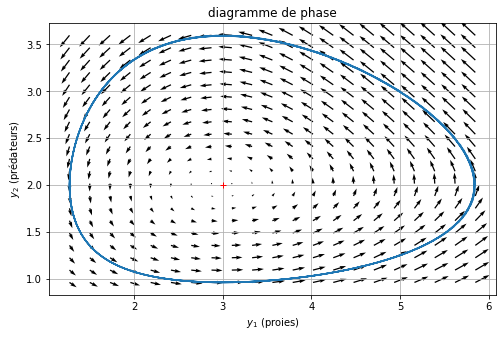

In [54]:
figure(figsize=(8,5))
Y1,Y2 = meshgrid(linspace(min(sol_1),max(sol_1),21),linspace(min(sol_2),max(sol_2),21))
V1,V2 = pphi_odeint([Y1,Y2],tt) 
r1=sqrt(1+V1**2)
r2=sqrt(1+V2**2)
quiver(Y1, Y2, V1/r1, V2/r2) 
plot(sol_1,sol_2)
plot(c/d,a/b, '+r')

grid()
xlabel(r'$y_1$'+' (proies)')
ylabel(r'$y_2$'+ ' (prédateurs)');
plt.title('diagramme de phase')
plt.show()

* **Cosmétique : ajout de couleurs**

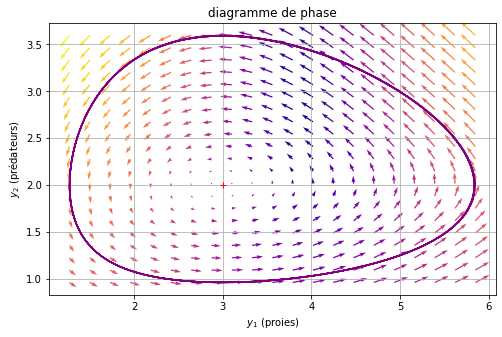

In [55]:
figure(figsize=(8,5))
cmap = plasma() #autumn(); #inferno()#plasma(); 
Colormap = cmap;  

Y1,Y2 = meshgrid(linspace(min(sol_1),max(sol_1),21),linspace(min(sol_2),max(sol_2),21))
V1,V2 = pphi_odeint([Y1,Y2],tt) 

#calcul de la matrice de couleurs
r1=sqrt(1+V1**2)
r2=sqrt(1+V2**2)


u = np.cos(Y1)*Y2
v = np.sin(Y1)*Y2

n = -2
color_array = np.sqrt(((v-n)/2)**2 + ((u-n)/2)**2)


quiver(Y1, Y2, V1/r1, V2/r2, color_array) 

plot(sol_1,sol_2, color = 'purple')
plot(c/d,a/b, '+r')

grid()
xlabel(r'$y_1$'+' (proies)')
ylabel(r'$y_2$'+ ' (prédateurs)');
plt.title('diagramme de phase')
plt.show()